<a href="https://colab.research.google.com/github/vankhoa21991/cyberlab/blob/main/tutorial/week1_linear/theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
%matplotlib inline
import random
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

print(tf.__version__)

2.11.0


# Linear regression với tensorflow

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]] [[ 39343.]
 [ 46205.]
 [ 37731.]
 [ 43525.]
 [ 39891.]
 [ 56642.]
 [ 60150.]
 [ 54445.]
 [ 64445.]
 [ 57189.]
 [ 63218.]
 [ 55794.]
 [ 56957.]
 [ 57081.]
 [ 61111.]
 [ 67938.]
 [ 66029.]
 [ 83088.]
 [ 81363.]
 [ 93940.]
 [ 91738.]
 [ 98273.]
 [101302.]
 [113812.]
 [109431.]
 [105582.]
 [116969.]
 [112635.]
 [122391.]
 [121872.]]


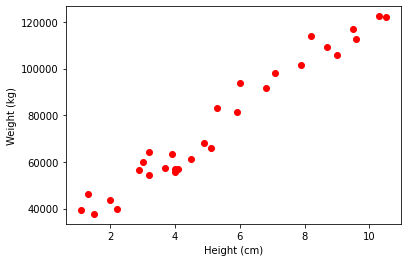

In [81]:
# height (cm)
X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T
# weight (kg)
Y = np.array([[ 49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68]]).T

df = pd.read_csv('Salary.csv')
 
X = df.iloc[:,0]
Y = df.iloc[:,1]

X= np.expand_dims(X, axis=0).T
Y= np.expand_dims(Y, axis=0).T
print(X, Y)
# Visualize data 
plt.plot(X, Y, 'ro')
# plt.axis([140, 190, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

In [82]:
def plot(x, y):
  plt.scatter(X,Y, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Height')
  plt.ylabel('Weight')
  plt.legend()

## Tính toán sử dụng sklearn

In [83]:
from sklearn.linear_model import LinearRegression

In [84]:
reg = LinearRegression()
reg.fit(X, Y)

# print the model coefficients
print('Coefficients:', reg.coef_)
print('Bias:', reg.intercept_)

Coefficients: [[9449.96232146]]
Bias: [25792.20019867]


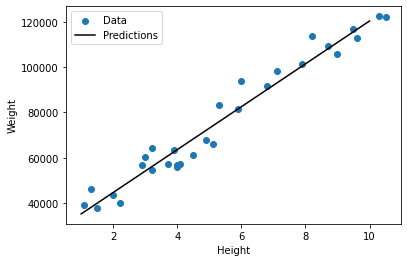

In [88]:
x = tf.linspace(1, 10, 11)
x = tf.transpose(tf.expand_dims(x, axis=0))
y_pred = reg.predict(x)
plot(x, y_pred)

## Tính toán bằng tensorflow

In [98]:
model = Sequential()
model.add(Dense(1, input_dim=1))
model.add(Activation('linear'))
model.compile(optimizer=tf.keras.optimizers.SGD(0.01),loss='mse')
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1)                 2         
                                                                 
 activation_3 (Activation)   (None, 1)                 0         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [99]:
model.predict(X)

1/1 [==============================] - 0s 74ms/step


array([[0.59933  ],
       [0.7082991],
       [0.8172682],
       [1.0896909],
       [1.19866  ],
       [1.5800519],
       [1.6345364],
       [1.7435055],
       [1.7435055],
       [2.0159283],
       [2.1248972],
       [2.1793818],
       [2.1793818],
       [2.2338665],
       [2.4518046],
       [2.6697428],
       [2.7787118],
       [2.887681 ],
       [3.2145882],
       [3.2690728],
       [3.7049491],
       [3.8684027],
       [4.3042793],
       [4.467733 ],
       [4.740155 ],
       [4.9036093],
       [5.176032 ],
       [5.2305164],
       [5.6119084],
       [5.720877 ]], dtype=float32)

In [101]:
history = model.fit(
    X,
    Y,
    epochs=500,
    verbose=0,
    # Calculate validation results on 20% of the training data.
   )

In [102]:
weights, bias = model.get_weights()
print('Coefficients:', weights)
print('Bias:', bias[0])

Coefficients: [[9456.093]]
Bias: 25750.889


In [103]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,epoch
495,31271336.0,495
496,31271328.0,496
497,31271330.0,497
498,31271332.0,498
499,31271328.0,499


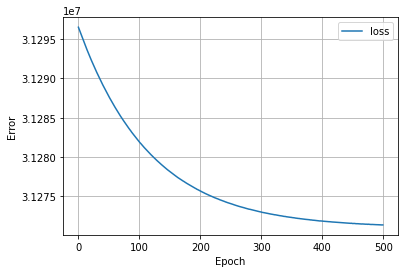

In [105]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  # plt.plot(history.history['val_loss'], label='val_loss')
  # plt.ylim([0, 20])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [106]:
y_pred = model.predict(X)
y_pred

1/1 [==============================] - 0s 30ms/step


array([[ 36152.59 ],
       [ 38043.81 ],
       [ 39935.027],
       [ 44663.074],
       [ 46554.293],
       [ 53173.56 ],
       [ 54119.164],
       [ 56010.387],
       [ 56010.387],
       [ 60738.43 ],
       [ 62629.65 ],
       [ 63575.258],
       [ 63575.258],
       [ 64520.867],
       [ 68303.305],
       [ 72085.74 ],
       [ 73976.96 ],
       [ 75868.18 ],
       [ 81541.836],
       [ 82487.445],
       [ 90052.32 ],
       [ 92889.15 ],
       [100454.02 ],
       [103290.85 ],
       [108018.9  ],
       [110855.73 ],
       [115583.77 ],
       [116529.38 ],
       [123148.65 ],
       [125039.87 ]], dtype=float32)

1/1 [==============================] - 0s 51ms/step


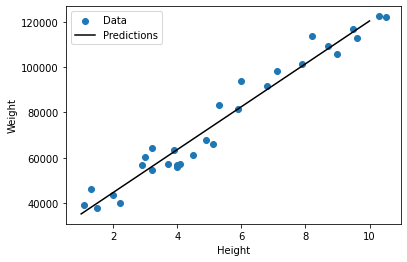

In [107]:
x = tf.transpose(tf.linspace(1, 10, 11))
y_pred = model.predict(x)
plot(x, y_pred)

# Linear regression với pytorch

In [ ]:
def synthetic_data(w, b, num_examples):  
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

In [ ]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [ ]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([-1.3369, -0.4857]) 
label: tensor([3.1712])


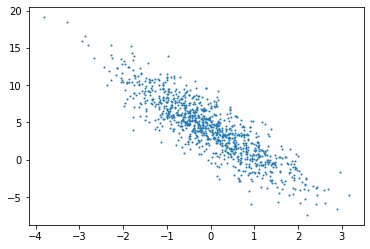

In [ ]:
plt.scatter(features[:,1].detach().numpy(), labels.detach().numpy(), 1);

## Solve with gradient descent

In [ ]:
# dataloader
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]
        
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.2241,  0.5666],
        [ 0.5130,  0.1888],
        [-0.6608, -0.1084],
        [-0.6809, -0.5367],
        [ 0.4570, -0.5945],
        [-1.0138, -0.6711],
        [ 1.0391,  0.0913],
        [ 0.2555, -0.1703],
        [ 0.2779, -0.5333],
        [-0.5160,  0.3799]]) 
 tensor([[1.8314],
        [4.5896],
        [3.2387],
        [4.6824],
        [7.1537],
        [4.4493],
        [5.9593],
        [5.2822],
        [6.5593],
        [1.8758]])


In [ ]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [ ]:
def linreg(X, w, b):  #@save
    """The linear regression model."""
    return torch.matmul(X, w) + b

In [ ]:
def squared_loss(y_hat, y):  #@save
    """Squared loss."""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [ ]:
def sgd(params, lr, batch_size):  #@save
    """Minibatch stochastic gradient descent."""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [ ]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

In [ ]:
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        out = net(X, w, b)
        l = loss(out, y)  # Minibatch loss in `X` and `y`
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # Update parameters using their gradient
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.034239
epoch 2, loss 0.000129
epoch 3, loss 0.000051


In [ ]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([ 0.0002, -0.0005], grad_fn=<SubBackward0>)
error in estimating b: tensor([0.0008], grad_fn=<RsubBackward1>)
